In [3]:
## Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
url = r'https://raw.githubusercontent.com/natthawit-jan/car_price_prediction_proj/master/Car_Purchasing_Data.csv'
df = pd.read_csv(url)

In [14]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [97]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [98]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [99]:

df['Customer Name Length'] = df['Customer Name'].apply(lambda d: len(d.replace(' ', '')))

In [100]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,Customer Name Length
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877,12
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566,12
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921,14
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313,14
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248,11


<AxesSubplot:xlabel='Customer Name Length', ylabel='Car Purchase Amount'>

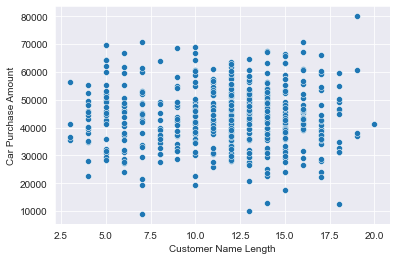

In [101]:
sns.scatterplot(data=df, x="Customer Name Length", y="Car Purchase Amount")

In [112]:
cols = [name for name in df.select_dtypes('number').columns if name != 'Car Purchase Amount']
P = df.corr(numeric_only=True).drop(columns=cols, index='Car Purchase Amount').T

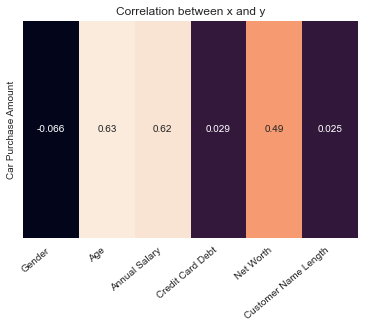

In [131]:
ax = sns.heatmap(P, annot=True, cbar=False)
ax.set_title('Correlation between x and y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [118]:
## Drop Country column since only USA is present
if 'Country' in df.columns:
    df.drop(columns='Country', inplace=True)
if 'Customer Name' in df.columns:
    df.drop(columns='Customer Name', inplace=True)

In [120]:
df['Customer e-mail'].apply(lambda d: d.split('@')[1]).unique()

array(['quisaccumsanconvallis.edu', 'diam.co.uk',
       'ametconsectetueradipiscing.co.uk', 'dignissim.com',
       'egetmollislectus.net', 'Aliquamerat.edu', 'at.co.uk',
       'Suspendissetristiqueneque.co.uk', 'sedsemegestas.org',
       'nuncest.com', 'dui.org', 'purus.edu', 'ipsum.edu',
       'Seddiamlorem.ca', 'aaliquetvel.co.uk', 'ut.org',
       'pedenonummyut.net', 'tinciduntpede.org', 'augue.net', 'primis.ca',
       'risusNuncac.co.uk', 'sapien.co.uk', 'augue.edu', 'tincidunt.org',
       'duiCum.com', 'magnased.com', 'vulputateveliteu.com', 'turpis.org',
       'non.co.uk', 'Nulla.net', 'erat.com', 'magnaPraesent.ca',
       'idsapien.co.uk', 'acipsumPhasellus.co.uk', 'dignissim.co.uk',
       'dolornonummyac.com', 'Morbiquisurna.ca', 'Integersemelit.com',
       'Infaucibus.ca', 'lacusvariuset.org', 'posuerecubiliaCurae.co.uk',
       'consequatpurusMaecenas.com', 'inhendrerit.ca',
       'Fuscefermentumfermentum.edu', 'orci.org', 'Duisgravida.co.uk',
       'miAliquam.c